# Welcome to My Diet Simulation Experiment!

## Experiment overview

In this notebook I will be creating a very simplified simulation that will show the relation of diet and overall well being of an Axolotl and a Human.  

I will be creating a base animal that has features that both Axolotls and Humans share, such as

### Attributes:
- Name
- Diet Type
- Healing potential
- Growth potential

### Actions:
- eat
- heal
- become injured

With this base Animal I will be able to create more specific versions for Axolotls and Humans that will reflect their respective diets.  

This program will be ran in a loop that will run the specific actions of both Animals at the same time and graph the resulting data.  

The goal is to show that changing the diet of an animal can cause its cells to be less efficent at maintaining homeostatis and also allowing the animal to grow and progress.

In [107]:
# Importing the needed library to create the base Animal
from abc import ABC, abstractmethod
import enum

In [108]:
class DietType(enum.Enum):
    HERBIVORE = 'herbivore'
    CARNIVORE = 'carnivore'
    OMNIVORE = 'omnivore'

In [109]:
class Animal(ABC):
    def __init__(self, name, dietType, healRate, growthRate):
        self.name = name
        self.dietType = dietType
        self.health = 100
        self.size = 1
        self.healRate = healRate
        self.growthRate = growthRate
    
    @abstractmethod
    def heal(self):
        pass
        
    @abstractmethod
    def eat(self):
        pass
    
    @abstractmethod
    def takeDamage(self, dmg):
        pass
        

## Now that we have a base Animal defined we can create the more specific Axolotl and Human versions  
We are going to say that if an Axolotl is a Carvivore they will have 100 % chance for growth and healing becasue that is their natural diet. But when we change to Omnivore they both take a slight hit but still remain at 75% each, and when the diet type is Herbivore they take an even larger hit because they are no longer getting their meat that their original diet required.

In [110]:
class Axolotl(Animal):
    def __init__(self, name, dietType):
        if(dietType == DietType.OMNIVORE):
            self.healPotential = .75
            self.growthPotential = .75
        elif(dietType == DietType.HERBIVORE):
            self.healPotential = .50
            self.growthPotential = .50
        elif(dietType == DietType.CARNIVORE):
            self.healPotential = 1.0
            self.growthPotential = 1.0
        else:
            raise TypeError('dietType must be of Type DietType.')
        super().__init__(name, dietType, .3, .15)
        
        
    def heal(self):
        healAmnt = 1 + self.healPotential + self.healRate
        if self.health + healAmnt > 100:
            self.health = 100
        else:
            self.health += healAmnt
        
    def eat(self):
        self.size += 1 * self.growthPotential + self.growthRate
        
    def takeDamage(self, dmg):
        self.health -= dmg

Since it has been a long debate for the best type of diet for humans I will keep it very very simple. For the human we are going to say that as an Omnivore we get a good balance of both growth and healing, as a Herbivore we get better healing potential, and as a Carnivore we get better growth potential but less healing potential.

In [111]:
class Human(Animal):
    def __init__(self, name, dietType):
        if(dietType == DietType.OMNIVORE):
            self.healPotential = .75
            self.growthPotential = .75
        elif(dietType == DietType.HERBIVORE):
            self.healPotential = 1.0
            self.growthPotential = .50
        elif(dietType == DietType.CARNIVORE):
            self.healPotential = .50
            self.growthPotential = 1.0
        else:
            raise TypeError('dietType must be of Type DietType.')
        super().__init__(name, dietType, .25, .5)
        self.size = 5
        
    def heal(self):
        healAmnt = 1 + self.healPotential + self.healRate
        if self.health + healAmnt > 100:
            self.health = 100
        else:
            self.health += healAmnt
    
    def eat(self):
        self.size += 5 * self.growthPotential + self.growthRate
        
    def takeDamage(self, dmg):
        self.health -= dmg

With that being said here is a test situation where we have an axolotl named fred that is an Omnivore. When we print freds healthPotential it should read .75, he should also take the amount of damage we specify and also heal from that damage based on his healPotential.

In [112]:
axolotl_fred = Axolotl('fred', DietType.OMNIVORE)

print('healthPotential:', axolotl_fred.healPotential)
print('health:', axolotl_fred.health)
print('fred takes 10 damage.')
axolotl_fred.takeDamage(10)
print('health:', axolotl_fred.health)
print('fred heals.')
axolotl_fred.heal()
print('health:', axolotl_fred.health)
print('size:', axolotl_fred.size)
print('fred eats.')
axolotl_fred.eat()
print('size:', axolotl_fred.size)

healthPotential: 0.75
health: 100
fred takes 10 damage.
health: 90
fred heals.
health: 92.05
size: 1
fred eats.
size: 1.9


Now that we have our Animals defined and their behaviors specified we can start looking at what might happen when the are carrying out their lives with different diets

## Creating the virtual world for the animals to interact

We will create a simulation of a world that every 1 second will have the animals do a random action. Each second we will also record the animals state to graph later.

In [113]:
import time
import random
import copy

In [114]:
# 1, 2 = eat, 3, 4 = heal, 5 = take damage
actions = [1, 2, 3, 4, 5]

def doRandomAction(animals):
    action = random.choice(actions)
    for animal in animals:
        if(action == 1 or action == 2):
            animal.eat()
        elif(action == 3 or action == 4):
            animal.heal()
        else:
            animal.takeDamage(random.randrange(1, 10, 2))

In [115]:
def runSimulation(animals, times):
    saves = []
    # for 15 cycles perform a random action on each animal and saves copies of the results.
    for i in range(times):
        doRandomAction(animals)
        saves.append(copy.deepcopy(animals))
    
    return saves

### Now that we have the base for the Animals and their Simulated Environment we can create some data.
We will start with the **Axolotls**. First we will create one axolotl for each DietType.

In [116]:
frank = Axolotl('frank', DietType.CARNIVORE)
mark  = Axolotl('mark', DietType.HERBIVORE)
fred  = Axolotl('fred', DietType.OMNIVORE)

axolotls = [frank, fred, mark]

axolotl_data = runSimulation(axolotls, 15)

print('\nnumber of saves:', len(axolotl_data))


number of saves: 15


We will also do the same for the **Humans**.

In [117]:
bob  = Human('bob', DietType.CARNIVORE)
sara = Human('sara', DietType.HERBIVORE)
dave = Human('dave', DietType.OMNIVORE)

humans = [bob, dave, sara]

human_data = runSimulation(humans, 15)

print('\nnumber of saves:', len(human_data))


number of saves: 15


### We have our data for all 3 Diet Types in Humans and Axolotls. We can now graph our data and see how it compares.

In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
def plotAnimalData(animal_type, animal_data):
    health_carn = []
    health_herb = []
    health_omni = []
    
    size_carn = []
    size_herb = []
    size_omni = []

    for animal_entry in animal_data:
        for i in range(3):
            if i == 0:
                health_carn.append(animal_entry[i].health)
                size_carn.append(animal_entry[i].size)
            elif i == 1:
                health_herb.append(animal_entry[i].health)
                size_herb.append(animal_entry[i].size)
            elif i == 2:
                health_omni.append(animal_entry[i].health)
                size_omni.append(animal_entry[i].size)

    plt.plot(health_carn, color = 'red', label='carnivore')
    plt.plot(health_herb, color = 'green', label='herbivore')
    plt.plot(health_omni, color = 'orange', label='omnivore')

    plt.xlabel('Iterations')
    plt.ylabel(animal_type + ' Health')
    plt.title(animal_type + ' Health Change Per Diet')

    plt.legend()
    plt.show()
    
    plt.plot(size_carn, color = 'red', label='carnivore')
    plt.plot(size_herb, color = 'green', label='herbivore')
    plt.plot(size_omni, color = 'orange', label='omnivore')

    plt.xlabel('Iterations')
    plt.ylabel(animal_type + ' Size')
    plt.title(animal_type + ' Size Change Per Diet')

    plt.legend()
    plt.show()

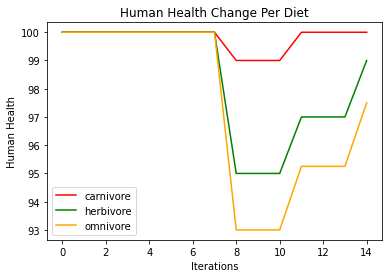

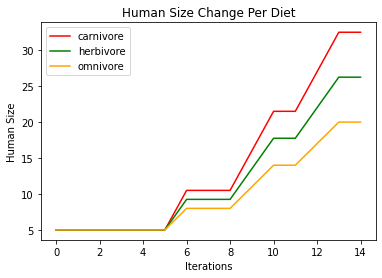

In [120]:
plotAnimalData('Human', human_data)

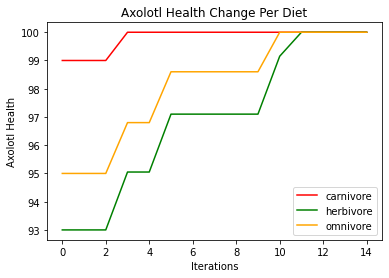

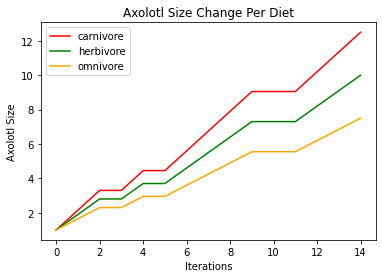

In [121]:
plotAnimalData('Axolotl', axolotl_data)